# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [376]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [377]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [378]:
#  1. Get the total rides for each city type
per_city = pyber_data_df.groupby(["city"])
rides_per_city = per_city.count()["ride_id"]
rides_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [379]:
# 2. Get the total drivers for each city type
drivers_per_city = per_city.sum()["driver_count"]
drivers_per_city.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [380]:
#  3. Get the total amount of fares for each city type
fares_per_city = per_city.sum()["fare"]
fares_per_city.head()

city
Amandaburgh      443.55
Barajasview      557.31
Barronchester    582.76
Bethanyland      593.21
Bradshawfurt     400.64
Name: fare, dtype: float64

In [381]:
#  4. Get the average fare per ride for each city type. 
per_type = pyber_data_df.groupby("type")
per_type.all()

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,True,True,True,True,True
Suburban,True,True,True,True,True
Urban,True,True,True,True,True


In [382]:
fares_per_type = per_type.sum()["fare"]
fares_per_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [383]:
rides_per_type = per_type.count()["ride_id"]
rides_per_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [384]:
average_fare_per_ride_by_type = fares_per_type / rides_per_type
average_fare_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [385]:
# 5. Get the average fare per driver for each city type.
city_per_type = city_data_df.groupby(["type"])
drivers_per_type = city_per_type.sum()["driver_count"]
drivers_per_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [386]:
average_fare_per_driver_by_type = fares_per_type / drivers_per_type
average_fare_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [387]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {
        "Total Rides": rides_per_type,
        "Total Drivers": drivers_per_type,
        "Total Fares": fares_per_type,
        "Average Fare per Ride": average_fare_per_ride_by_type,
        "Average Fare per Driver": average_fare_per_driver_by_type,
    }
)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [388]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [389]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [390]:
# 1. Read the merged DataFrame
by_date = pyber_data_df
by_date["date"] = pd.to_datetime(by_date["date"])
by_date

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [391]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
by_city_and_date = by_date.groupby(["city", "date"])
by_city_and_date.all()

fare  ride_id  driver_count  type
city         date                                                  
Amandaburgh  2019-01-02 09:57:04  True     True          True  True
             2019-01-11 02:22:07  True     True          True  True
             2019-01-13 16:04:10  True     True          True  True
             2019-01-21 04:12:54  True     True          True  True
             2019-01-29 23:28:12  True     True          True  True
...                                ...      ...           ...   ...
Williamsview 2019-04-15 16:09:08  True     True          True  True
             2019-04-16 08:23:02  True     True          True  True
             2019-04-18 02:07:15  True     True          True  True
             2019-04-26 00:30:10  True     True          True  True
             2019-05-04 14:56:45  True     True          True  True

[2375 rows x 4 columns]

In [392]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df = by_date.reset_index()
df

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...,...
2370,2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [393]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_pivot = df.pivot(index='date', columns='type', values='fare')
df_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [394]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range_df = df_pivot.loc['2019-01-01':'2019-04-29']
date_range_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [395]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
by_date.index = pd.to_datetime(by_date['date'])

In [396]:
# 7. Check that the datatype for the index is datetime using df.info()
by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   datetime64[ns]
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   int64         
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 129.9+ KB


In [397]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
dr_week_df = date_range_df.resample('W').sum()
dr_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [398]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

x_axis = dr_week_df.index.values
y_axis = dr_week_df

chart_title = "Total Fare by City Type"
chart_ylabel = "Fare ($ USD)"

y_axis

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


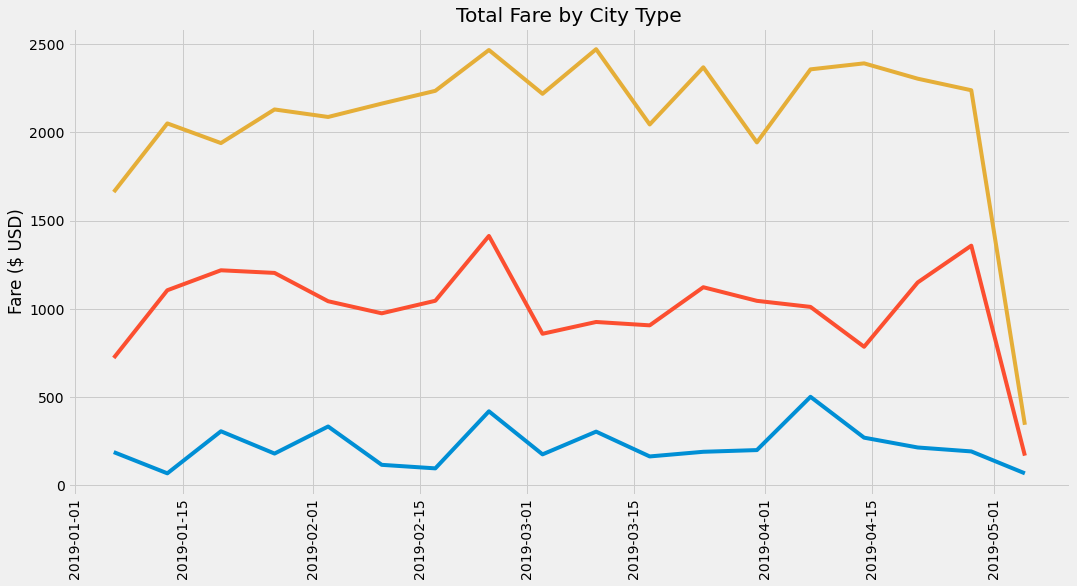

In [399]:
# Graph 1
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x_axis, y_axis)
ax.set_title(chart_title)
ax.set_ylabel(chart_ylabel)
plt.xticks(rotation=90)
plt.show()

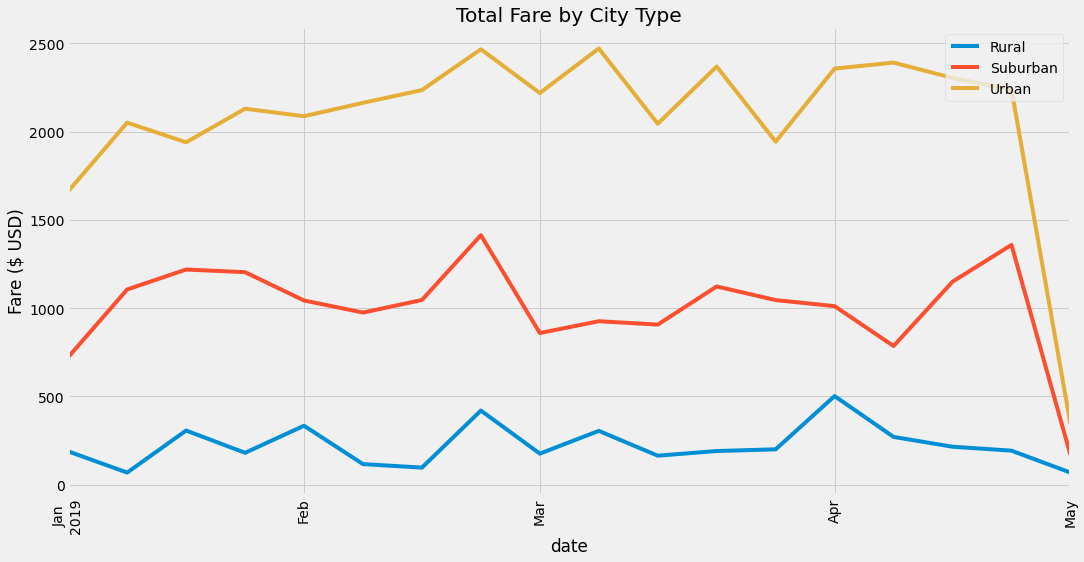

<Figure size 432x288 with 0 Axes>

In [400]:
# Graph 2
dr_week_df.plot(kind="line", figsize=(16,8), title=chart_title, ylabel=chart_ylabel)

plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()